### Task 1- Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Loan = pd.read_csv('Loan_details.csv')
Employment = pd.read_csv('Employment_details.csv')
Personal= pd.read_csv('Personal_details.csv')

In [3]:
#Connect different data sources

df = pd.merge(Loan, Employment, on= 'Id')
df = pd.merge(df, Personal, on= 'Id')

In [4]:
df.head()

,Id,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status,Self_Employed,Income of applicant,Income of coapplicant,Gender,Marital Status,Family members,Status of education
0,31453,400.0,360.0,1.0,Semiurban,Y,No,3783,3205,Male,Yes,NaN,Graduate
1,21375,438.0,360.0,1.0,Semiurban,Y,NaN,6833,3423,Female,No,0,Not Graduate
2,27992,214.0,360.0,1.0,Urban,Y,NaN,3765,3655,Male,Yes,0,Graduate
3,3326,128.0,360.0,1.0,Urban,Y,No,2474,2584,Male,No,0,Not Graduate
4,22227,116.0,84.0,0.0,Urban,N,No,3000,0,Male,Yes,2,Graduate


In [5]:
df.describe()

,Id,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Income of applicant,Income of coapplicant
count,47856.000000,45660.000000,46367.000000,44409.000000,47856.000000,47856.000000
mean,23928.500000,135.906789,343.222658,0.829539,4854.436748,1664.988486
std,13814.981578,70.156703,61.561339,0.376041,3900.875350,1910.643113
min,1.000000,30.000000,84.000000,0.000000,1064.000000,0.000000
25%,11964.750000,100.000000,360.000000,1.000000,2666.000000,0.000000
50%,23928.500000,125.000000,360.000000,1.000000,3660.000000,1387.000000
75%,35892.250000,160.000000,360.000000,1.000000,5566.000000,2583.000000
max,47856.000000,481.000000,480.000000,1.000000,25515.000000,8610.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id                                     47856 non-null  int64  
 1   LoanAmount applied for (in thoudands)  45660 non-null  float64
 2   Loan_Amount_Duration                   46367 non-null  float64
 3   Credit_History                         44409 non-null  float64
 4   Property_Area                          47856 non-null  object 
 5   Loan_Status                            47856 non-null  object 
 6   Self_Employed                          45311 non-null  object 
 7   Income of applicant                    47856 non-null  int64  
 8   Income of coapplicant                  47856 non-null  int64  
 9   Gender                                 46676 non-null  object 
 10  Marital Status                         47856 non-null  object 
 11  Fa

In [7]:
# Changing Family members column to from object to float
df['Family members'] = pd.to_numeric(df['Family members'], errors= 'coerce')
df.dtypes['Family members']

dtype('float64')

In [8]:
df.dtypes

Id                                         int64
LoanAmount applied for (in thoudands)    float64
Loan_Amount_Duration                     float64
Credit_History                           float64
Property_Area                             object
Loan_Status                               object
Self_Employed                             object
Income of applicant                        int64
Income of coapplicant                      int64
Gender                                    object
Marital Status                            object
Family members                           float64
Status of education                       object
dtype: object

In [9]:
#Check if missing values and outliers are there
df.isnull().sum()

Id                                          0
LoanAmount applied for (in thoudands)    2196
Loan_Amount_Duration                     1489
Credit_History                           3447
Property_Area                               0
Loan_Status                                 0
Self_Employed                            2545
Income of applicant                         0
Income of coapplicant                       0
Gender                                   1180
Marital Status                              0
Family members                           4890
Status of education                         0
dtype: int64

#### Finding outliers in Numerical variable

In [10]:
#checking the outlier with the Z-score
from scipy import stats

z_scores = stats.zscore(df['LoanAmount applied for (in thoudands)'])
threshold= 3
outliers = df['LoanAmount applied for (in thoudands)'][abs(z_scores)> threshold]
print(outliers)

z_scores = stats.zscore(df['Loan_Amount_Duration'])
threshold= 3
outliers = df['Loan_Amount_Duration'][abs(z_scores)> threshold]
print(outliers)

z_scores = stats.zscore(df['Family members'])
threshold= 3
outliers = df['Family members'][abs(z_scores)> threshold]
print(outliers)

Series([], Name: LoanAmount applied for (in thoudands), dtype: float64)
Series([], Name: Loan_Amount_Duration, dtype: float64)
Series([], Name: Family members, dtype: float64)


<AxesSubplot:xlabel='Family members'>

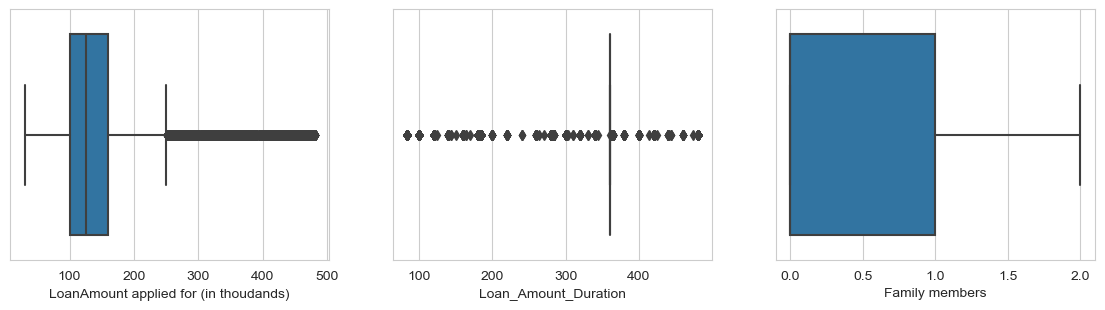

In [11]:
#For finding the outliers in numeric column using Matplotlib
plt.figure(figsize=(14,15))
sns.set_style(style='whitegrid')

    # Plot 1 
plt.subplot(4,3,1)
sns.boxplot(x='LoanAmount applied for (in thoudands)',data=df)

    # Plot 2
plt.subplot(4,3,2)
sns.boxplot(x='Loan_Amount_Duration',data=df)

    # Plot 3 
plt.subplot(4,3,3)
sns.boxplot(x='Family members',data=df)


#### Imputing missing values in Numerical variable

In [12]:
df.dropna(subset=['Loan_Amount_Duration', 'Family members'], inplace= True)

In [13]:
df['LoanAmount applied for (in thoudands)'].fillna(df['LoanAmount applied for (in thoudands)'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Id                                          0
LoanAmount applied for (in thoudands)       0
Loan_Amount_Duration                        0
Credit_History                           2868
Property_Area                               0
Loan_Status                                 0
Self_Employed                            2036
Income of applicant                         0
Income of coapplicant                       0
Gender                                    983
Marital Status                              0
Family members                              0
Status of education                         0
dtype: int64

#### Finding outliers in categorical variable

In [15]:
df['Credit_History'].value_counts()

1.0    32463
0.0     6409
Name: Credit_History, dtype: int64

In [16]:
df['Self_Employed'].value_counts()

No     34980
Yes     4724
Name: Self_Employed, dtype: int64

In [17]:
df['Gender'].value_counts()

Male      33735
Female     7022
Name: Gender, dtype: int64

In [18]:
df['Self_Employed'].fillna('No', inplace = True)
df['Gender'].fillna('Male', inplace = True)
df['Credit_History'].fillna('1.0', inplace = True)

In [19]:
df.isnull().sum()

Id                                       0
LoanAmount applied for (in thoudands)    0
Loan_Amount_Duration                     0
Credit_History                           0
Property_Area                            0
Loan_Status                              0
Self_Employed                            0
Income of applicant                      0
Income of coapplicant                    0
Gender                                   0
Marital Status                           0
Family members                           0
Status of education                      0
dtype: int64

In [20]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
47849    False
47850    False
47852    False
47853    False
47854    False
Length: 41740, dtype: bool

#### Other Queries

### Task 2 - Exploratory Data Analysis
Perform exploratory data analysis on the clean loan application dataset

#### 1.	Perform exploratory data analysis on the clean loan application dataset

--Same already has been performed above.

#### 2. Analyze the distribution of attributes such as gender, marital status, family members, education, applicant income, co-applicant income, loan amount, loan duration, credit history, property area, and loan status.

In [21]:
#For the convenince, let's distribute it 2 attributes.

# Categorical attributes: Gender, Marital Status, Education, Credit History, Property Area, Loan Status
categorical_attributes = ['Gender', 'Marital Status', 'Status of education', 'Credit_History', 'Property_Area', 'Loan_Status']

# Numerical attributes: Family Members, Applicant Income, Co-applicant Income, Loan Amount, Loan Duration
numerical_attributes = ['Family members', 'Income of applicant', 'Income of coapplicant', 'LoanAmount applied for (in thoudands)', 'Loan_Amount_Duration']

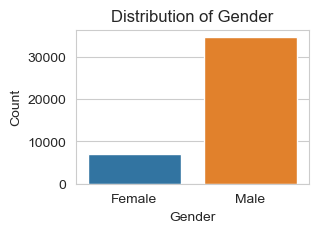

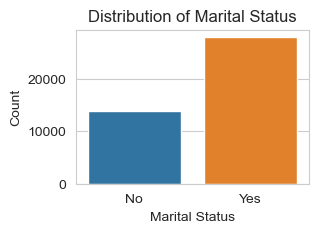

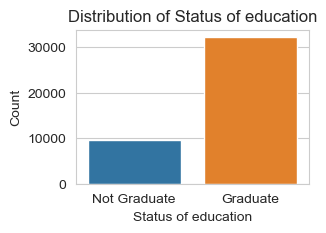

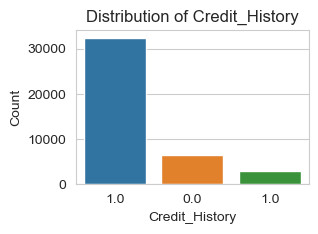

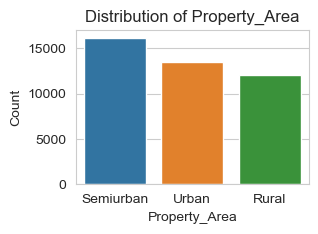

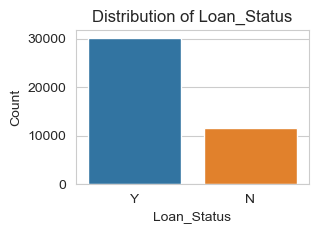

In [22]:
# Plotting distribution for categorical attribute
for attribute in categorical_attributes:
    plt.figure(figsize=(3, 2))
    sns.countplot(data=df, x=attribute)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Count")
    plt.show()


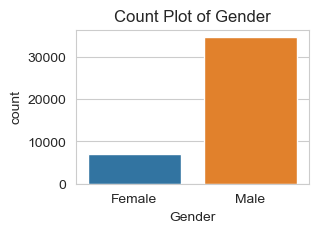

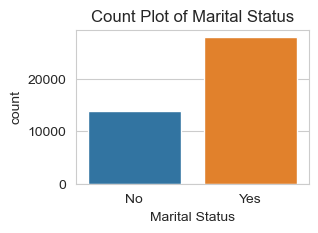

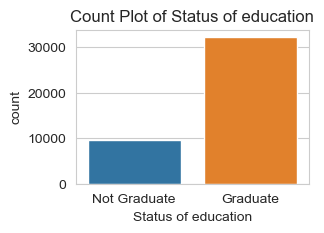

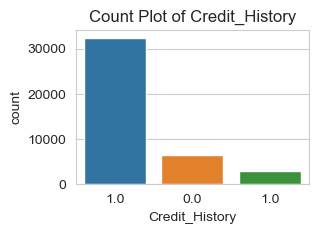

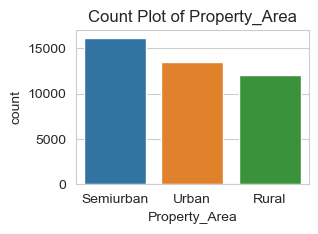

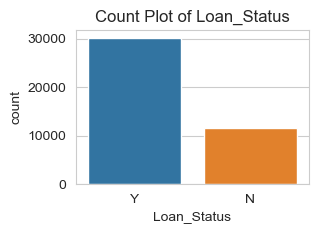

In [23]:
# Plotting count plots categorical attribute
for attribute in categorical_attributes:
    plt.figure(figsize=(3, 2))
    sns.countplot(x=attribute, data=df)
    plt.title(f"Count Plot of {attribute}")
    plt.show()


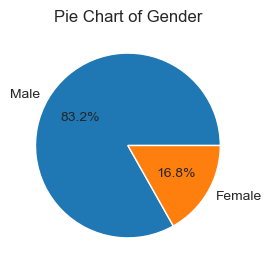

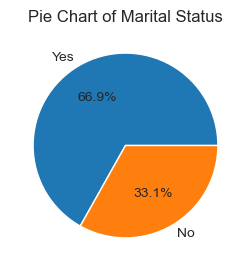

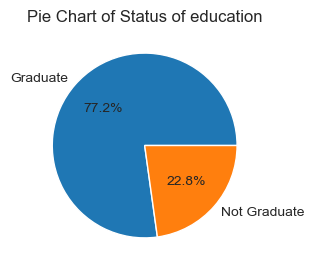

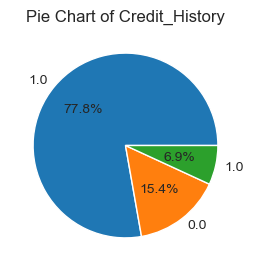

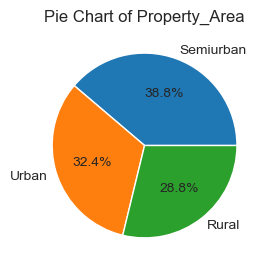

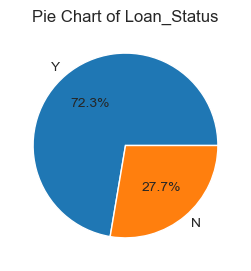

In [24]:
# Plotting pie charts for each attribute
for attribute in categorical_attributes:
    plt.figure(figsize=(4, 3))
    attribute_counts = df[attribute].value_counts()
    labels = attribute_counts.index
    sizes = attribute_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Pie Chart of {attribute}")
    plt.show()

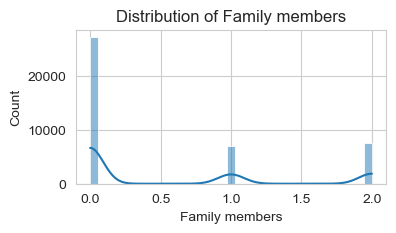

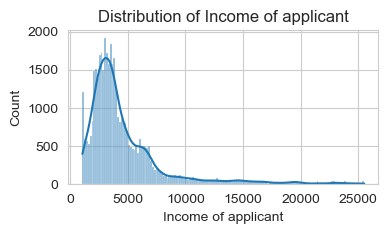

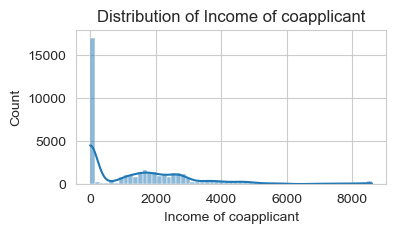

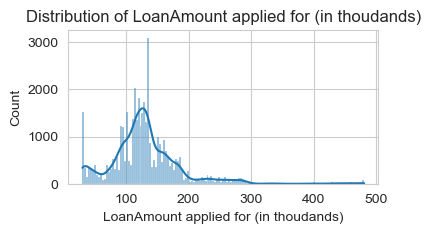

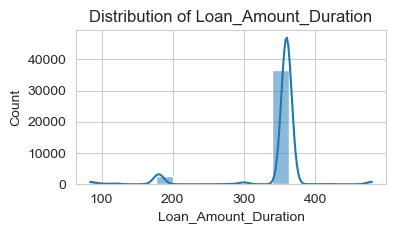

In [25]:
# Plotting the distribution of each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=df, x=attribute, kde=True)
    plt.title(f"Distribution of {attribute}")
    plt.show()

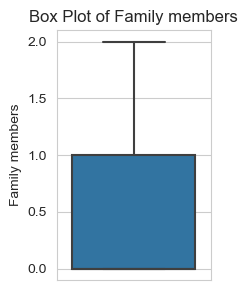

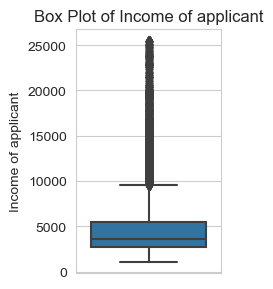

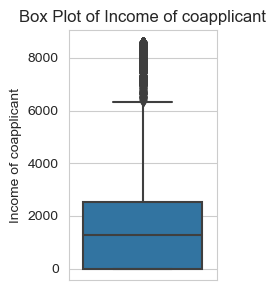

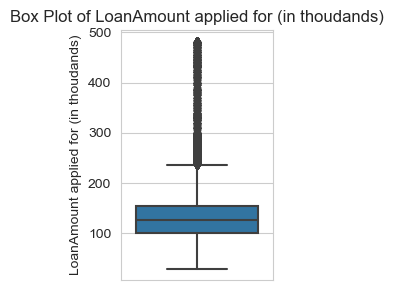

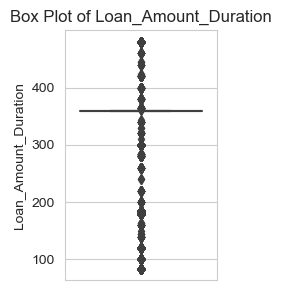

In [26]:
# Plotting box plots for numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(4, 3))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=attribute)
    plt.title(f"Box Plot of {attribute}")
    
    plt.tight_layout()
    plt.show()

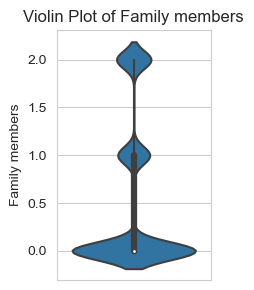

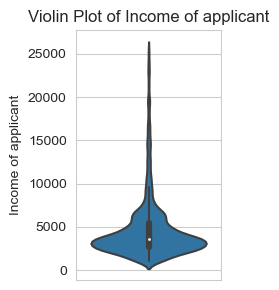

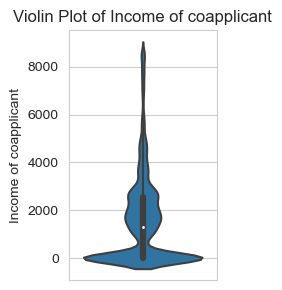

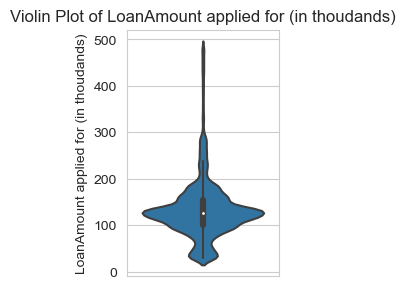

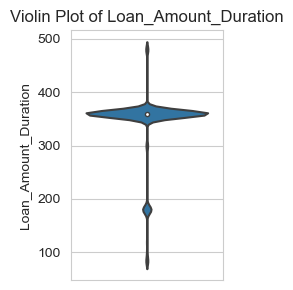

In [27]:
# Plotting violin plots for numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(4, 3))
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, y=attribute)
    plt.title(f"Violin Plot of {attribute}")

    plt.tight_layout()
    plt.show()

#### 3. Identify trends and patterns that contribute to loan approval, such as higher approval rates for certain gender, marital status, or educational backgrounds.

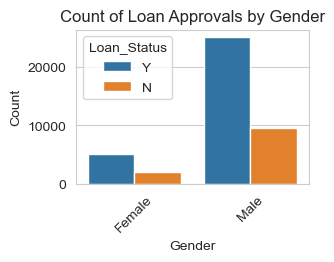

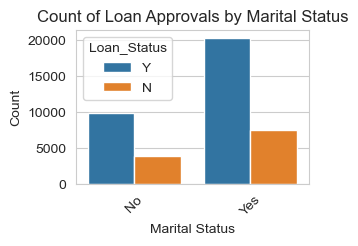

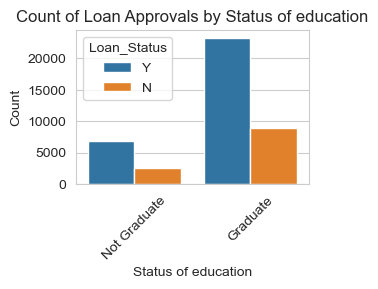

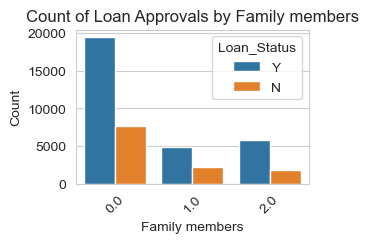

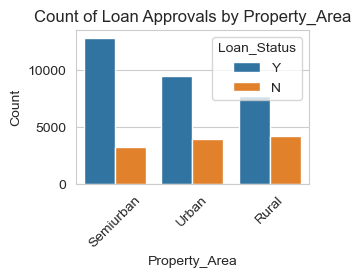

In [28]:
# Bar plots for gender, marital status, education, family members, and property area
columns = ['Gender', 'Marital Status', 'Status of education', 'Family members', 'Property_Area']

for col in columns:
    plt.figure(figsize=(3, 2))
    sns.countplot(x=col, data=df, hue='Loan_Status')
    plt.title(f'Count of Loan Approvals by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

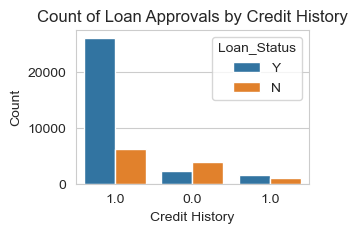

In [29]:
# Count plot for credit history
plt.figure(figsize=(3, 2))
sns.countplot(x='Credit_History', data=df, hue='Loan_Status')
plt.title('Count of Loan Approvals by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

#### 4. Explore the relationship between applicant income, co-applicant income, and loan amount to understand the borrowing capacity of applicants.

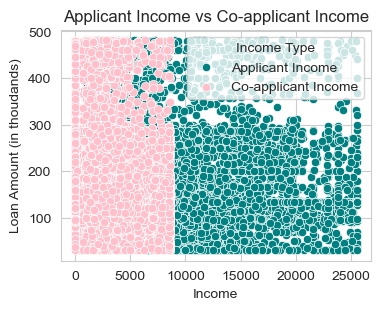

In [30]:
# Scatter plot with different colors for applicant income and co-applicant income
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Income of applicant', y='LoanAmount applied for (in thoudands)', data=df, color='teal', label='Applicant Income')
sns.scatterplot(x='Income of coapplicant', y='LoanAmount applied for (in thoudands)', data=df, color='pink', label='Co-applicant Income')
plt.title('Applicant Income vs Co-applicant Income')
plt.xlabel('Income')
plt.ylabel('Loan Amount (in thoudands)')
plt.legend(title='Income Type')
plt.show()

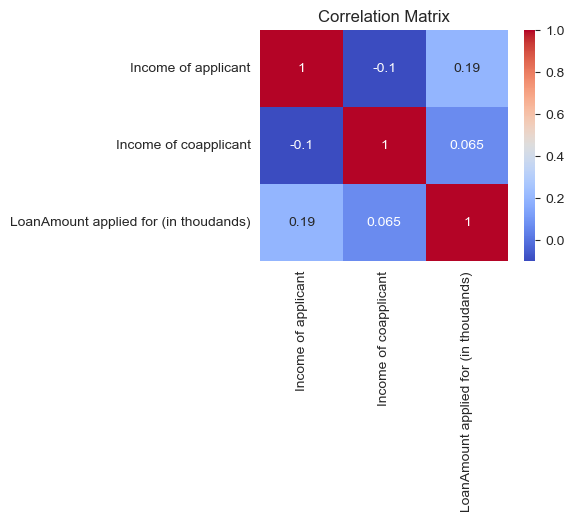

In [31]:
correlation_matrix = df[['Income of applicant', 'Income of coapplicant', 'LoanAmount applied for (in thoudands)']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### 5.	Investigate the impact of credit history on loan approval and analyze the distribution of credit history among approved and rejected applications.

Loan_Status            N         Y
Credit_History                    
0.0             0.628959  0.371041
1.0             0.193975  0.806025
1.0             0.423989  0.576011


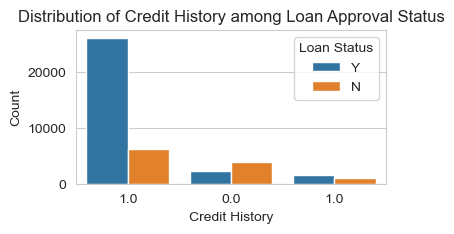

In [32]:
# Calculate loan approval based on credit history
loan_approval = df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
print(loan_approval)

# Visualize the distribution of credit history among approved and rejected applications
plt.figure(figsize=(4, 2))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Distribution of Credit History among Loan Approval Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### 6.	Analyze the distribution of loan durations and assess if there are any specific loan durations that are more likely to be approved.

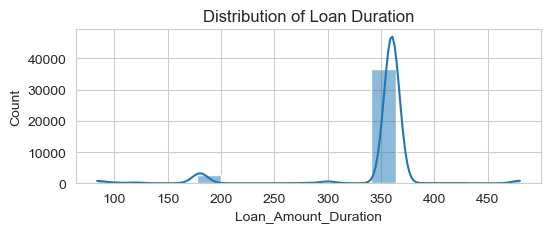

In [35]:
# Analyze the distribution of loan duration
plt.figure(figsize=(6, 2))
sns.histplot(df['Loan_Amount_Duration'], kde=True)
plt.title('Distribution of Loan Duration')
plt.xlabel('Loan_Amount_Duration')
plt.ylabel('Count')
plt.show()

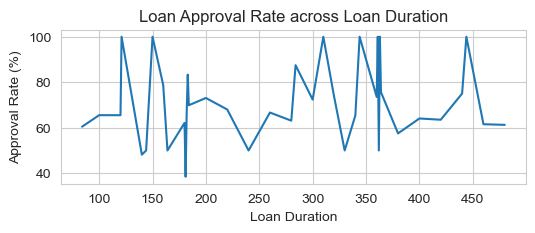

In [37]:
# Calculate loan approval rates based on loan duration
approval_rates = df.groupby('Loan_Amount_Duration')['Loan_Status'].value_counts(normalize=True).unstack().reset_index()
approval_rates['Approval_Rate'] = approval_rates['Y']  # Assuming 'Y' represents loan approval status
approval_rates['Approval_Rate'] *= 100  # Convert to percentage

# Visualize approval rate across loan duration using line plot
plt.figure(figsize=(6, 2))
sns.lineplot(x='Loan_Amount_Duration', y='Approval_Rate', data=approval_rates)
plt.title('Loan Approval Rate across Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Approval Rate (%)')
plt.show()

#### 7.	Examine the distribution of property areas (rural/urban) and determine if there is any correlation between property area and loan approval.

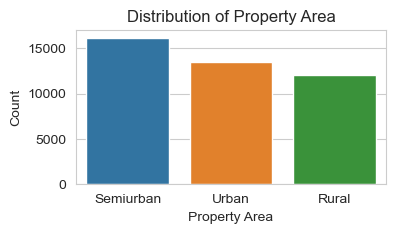

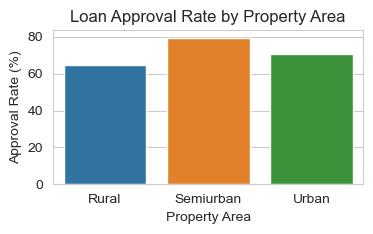

In [40]:
# Count plot for property area distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='Property_Area', data=df)
plt.title('Distribution of Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


# Calculate loan approval rates based on property area
approval_rates_by_area = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().reset_index()
approval_rates_by_area['Approval_Rate'] = approval_rates_by_area['Y']  # Assuming 'Y' represents loan approval status
approval_rates_by_area['Approval_Rate'] *= 100  # Convert to percentage


# Bar plot for approval rate across property area
plt.figure(figsize=(4, 2))
sns.barplot(x='Property_Area', y='Approval_Rate', data=approval_rates_by_area)
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Approval Rate (%)')
plt.show()

#### 8.	Utilize visualizations using matplotlib and seaborn libraries to present key findings and insights

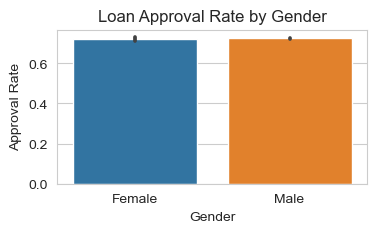

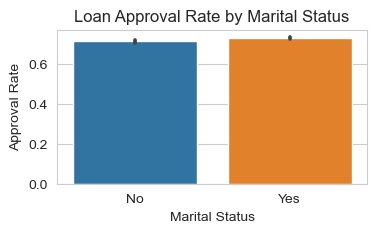

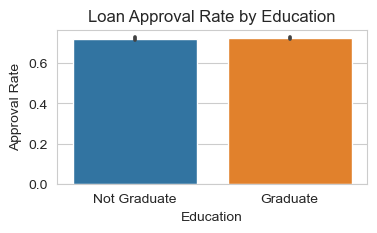

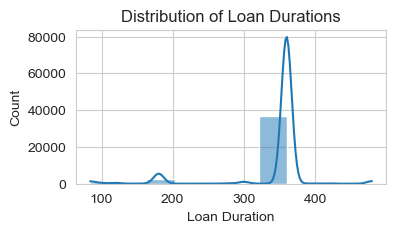

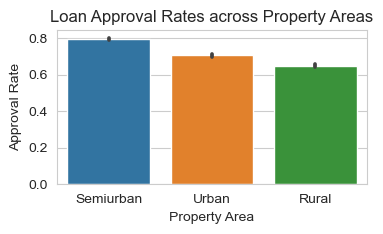

In [41]:
# Convert Loan_Status column to numeric format
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Visualizing Loan Approval Rate by Gender
plt.figure(figsize=(4, 2))
sns.barplot(x='Gender', y='Loan_Status', data=df)
plt.title("Loan Approval Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Approval Rate")
plt.show()

# Visualizing Loan Approval Rate by Marital Status
plt.figure(figsize=(4, 2))
sns.barplot(x='Marital Status', y='Loan_Status', data=df)
plt.title("Loan Approval Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Approval Rate")
plt.show()

# Visualizing Loan Approval Rate by Education
plt.figure(figsize=(4, 2))
sns.barplot(x='Status of education', y='Loan_Status', data=df)
plt.title("Loan Approval Rate by Education")
plt.xlabel("Education")
plt.ylabel("Approval Rate")
plt.show()

# Visualizing Distribution of Loan Durations
plt.figure(figsize=(4, 2))
sns.histplot(df['Loan_Amount_Duration'], bins=10, kde=True)
plt.title("Distribution of Loan Durations")
plt.xlabel("Loan Duration")
plt.ylabel("Count")
plt.show()

# Visualizing Loan Approval Rates across Property Areas
plt.figure(figsize=(4, 2))
sns.barplot(x='Property_Area', y='Loan_Status', data=df)
plt.title("Loan Approval Rates across Property Areas")
plt.xlabel("Property Area")
plt.ylabel("Approval Rate")
plt.show()

#### 9.	Provide recommendations to the bank based on the data analysis, such as targeting specific demographics or adjusting loan criteria to improve loan approval rates

#### 10.	Explore customer sentiment by analyzing patterns in loan approvals and rejections, identifying potential areas for improvement in customer satisfaction.


#### 11. Identify any data gaps or missing values in the dataset and propose strategies for handling missing data effectively.

#### 12.	 Assess the overall performance and effectiveness of the bank's loan application process based on the analysis results.

#### 13.	Provide actionable insights and recommendations that can help the bank improve customer experiences, optimize operations, and drive revenue growth.